<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research questions and data


For my final, I am looking to explore the relationships certain variables have with Housing prices. For example, how the case shiller home idex each year correlates with variables such as annual residential construction dollars spent. In addition to a dataset merged by year, I also have a dataset that is merged by state for data collected in Q2 of 2023. With this dataset, I can explore correlations between home prices and variables such as wage and population density. Lastly, I merged County level data in New Jersey to see how similar variables correlate in our own State.

Data was collected by multiple onlice sources such as the Federal Reserve and Statista - each dataset will have links to the data used in the comments

# Set up


In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import plotly.express as px
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


from google.colab import files


import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline

# First Dataset load in

In [2]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/demand.csv

In [3]:
!pwd

!ls

/content
ex1.csv  sample_data


In [4]:
dat=pd.read_csv('ex1.csv')

In [5]:
#What each variable means
#INTDSRUSM193N	Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)
#UMCSENT	University of Michigan: Consumer Sentiment
# GDP (gross domestic product)
#MORTGAGE15US	30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
#MSPUS	Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)

In [6]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/supply.csv

In [7]:
!pwd

!ls

/content
ex1.csv  sample_data


In [8]:
dat2=pd.read_csv('ex1.csv')

In [9]:
dat2.head(10)

,DATE,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,1/1/2003,4.2,1806.333333,421328.6667,14908
1,1/4/2003,3.833333333,1837.666667,429308.6667,15244
2,1/7/2003,3.633333333,1937.333333,458890,15614
3,1/10/2003,3.966666667,1972.333333,491437.3333,15654
4,1/1/2004,3.7,1994.666667,506856.3333,15895
5,1/4/2004,3.9,2080,526483.3333,16079
6,1/7/2004,4.3,2069.666667,552939,15656
7,1/10/2004,4.1,2086,561413.3333,15361
8,1/1/2005,4.266666667,2105,590790.3333,15748
9,1/4/2005,4.266666667,2137.666667,611957,16061


In [10]:
## what each variable name stands for
#PERMIT	New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)
#MSACSR	Monthly Supply of New Houses in the United States (Seasonally Adjusted)
#TLRESCONS	Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)
#EVACANTUSQ176N	Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted

In [11]:
#merge

In [12]:
merged1 = pd.merge(dat, dat2, how='outer', on=['DATE'],indicator=True)
merged1


,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,4.2,1806.333333,421328.6667,14908,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800.0,11312.766,3.833333333,1837.666667,429308.6667,15244,both
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900.0,11566.669,3.633333333,1937.333333,458890,15614,both
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800.0,11772.234,3.966666667,1972.333333,491437.3333,15654,both
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,3.7,1994.666667,506856.3333,15895,both
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1/4/2022,303.422667,5.266154,57.866667,NaN,449300.0,25248.476,8.7,1734.666667,947300.3333,15286,both
78,1/7/2022,301.726333,5.623077,56.100000,NaN,468000.0,25723.941,9.566666667,1610.666667,910346,15306,both
79,1/10/2022,297.896667,6.664615,58.800000,NaN,479500.0,26137.992,9.2,1455.333333,870620.6667,14554,both
80,1/1/2023,NaN,6.372308,64.633333,NaN,436800.0,26465.865,8.033333333,1424.333333,842559.6667,15053,both


In [13]:
#new vars
dat['RateCat'] = '''high rates'''
dat['RateCat'][0:7]

0    high rates
1    high rates
2    high rates
3    high rates
4    high rates
5    high rates
6    high rates
Name: RateCat, dtype: object

In [14]:
dat.loc[dat['MORTGAGE30US'] <5, 'RateCat']  = '''low rates'''

In [15]:
dat.groupby('RateCat').mean().round(0)

<ipython-input-15-df68cdc6d790>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat.groupby('RateCat').mean().round(0)


,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
RateCat,,,,,,
high rates,176.0,6.0,79.0,3.0,256048.0,15030.0
low rates,183.0,4.0,84.0,1.0,296640.0,18705.0


In [16]:
#3rd dataset shows S & P 500 statistics for each quarter in america- will merge with housing data
#link: https://datahub.io/core/s-and-p-500#data #aok: good!

In [17]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/dataaaa.csv

In [18]:
dat3=pd.read_csv('ex1.csv')

In [19]:
dat3.head(10)

,DATE,GDP,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1/1/2003,11174.129,895.84,16.12,28.50,181.7,4.05,1231.77,22.16,39.19,22.90
1,1/4/2003,11312.766,837.03,16.17,29.41,183.1,3.90,1142.11,22.06,40.13,21.21
2,1/7/2003,11566.669,846.63,16.22,30.32,184.2,3.81,1148.31,22.00,41.12,21.31
3,1/10/2003,11772.234,890.03,16.20,31.73,183.8,3.96,1209.80,22.02,43.13,22.43
4,1/1/2004,11923.447,935.96,16.19,33.14,183.5,3.57,1274.31,22.04,45.12,23.59
5,1/4/2004,12112.815,988.00,16.17,34.55,183.7,3.33,1343.70,21.99,46.99,24.83
6,1/7/2004,12305.307,992.54,16.31,35.89,183.9,3.98,1348.41,22.16,48.76,24.87
7,1/10/2004,12527.214,989.53,16.45,37.24,184.6,4.45,1339.22,22.26,50.40,24.64
8,1/1/2005,12767.286,1019.44,16.59,38.58,185.2,4.27,1375.23,22.38,52.04,25.24
9,1/4/2005,12922.656,1038.73,16.86,41.97,185.0,4.29,1402.77,22.76,56.67,25.68


In [20]:
# merge data (3 datasets in 1)

In [21]:
del merged1['_merge']

In [22]:
merged2 = pd.merge(merged1, dat3, on=['DATE'],indicator=True)
merged2

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP_x,MSACSR,PERMIT,TLRESCONS,...,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,4.2,1806.333333,421328.6667,...,895.84,16.12,28.50,181.70,4.05,1231.77,22.16,39.19,22.90,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800.0,11312.766,3.833333333,1837.666667,429308.6667,...,837.03,16.17,29.41,183.10,3.90,1142.11,22.06,40.13,21.21,both
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900.0,11566.669,3.633333333,1937.333333,458890,...,846.63,16.22,30.32,184.20,3.81,1148.31,22.00,41.12,21.31,both
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800.0,11772.234,3.966666667,1972.333333,491437.3333,...,890.03,16.20,31.73,183.80,3.96,1209.80,22.02,43.13,22.43,both
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,3.7,1994.666667,506856.3333,...,935.96,16.19,33.14,183.50,3.57,1274.31,22.04,45.12,23.59,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1/4/2022,303.422667,5.266154,57.866667,NaN,449300.0,25248.476,8.7,1734.666667,947300.3333,...,926.12,25.59,7.51,215.69,3.72,1072.72,29.64,8.70,16.38,both
78,1/7/2022,301.726333,5.623077,56.100000,NaN,468000.0,25723.941,9.566666667,1610.666667,910346,...,935.82,25.03,9.19,215.35,3.56,1085.67,29.03,10.66,16.69,both
79,1/10/2022,297.896667,6.664615,58.800000,NaN,479500.0,26137.992,9.2,1455.333333,870620.6667,...,1009.73,24.46,10.86,215.83,3.59,1168.80,28.32,12.57,18.09,both
80,1/1/2023,NaN,6.372308,64.633333,NaN,436800.0,26465.865,8.033333333,1424.333333,842559.6667,...,1044.55,23.90,12.54,215.97,3.40,1208.35,27.65,14.51,18.83,both


In [23]:
# There is more data included in the dat 3 dataset, so some data was not merged as expected. For example, data was collected for s&p
# that was not delinieted by a certain month or quarter. Also, some data was not collected for certain quarters in both datasets, which
# prevented this data from being merged

In [24]:
# this merge allows us to look at how the SP index compares to the CS index. You can see the comparision below

In [25]:
selected_data = merged2[['DATE','CSUSHPISA', 'SP500','_merge']] #aok: always investigate what happened after the merge!
selected_data

,DATE,CSUSHPISA,SP500,_merge
0,1/1/2003,129.321000,895.84,both
1,1/4/2003,131.756000,837.03,both
2,1/7/2003,135.013000,846.63,both
3,1/10/2003,138.835667,890.03,both
4,1/1/2004,143.298667,935.96,both
...,...,...,...,...
77,1/4/2022,303.422667,926.12,both
78,1/7/2022,301.726333,935.82,both
79,1/10/2022,297.896667,1009.73,both
80,1/1/2023,NaN,1044.55,both


In [26]:
selected_data.head(20)

,DATE,CSUSHPISA,SP500,_merge
0,1/1/2003,129.321000,895.84,both
1,1/4/2003,131.756000,837.03,both
2,1/7/2003,135.013000,846.63,both
3,1/10/2003,138.835667,890.03,both
4,1/1/2004,143.298667,935.96,both
5,1/4/2004,148.209000,988.00,both
6,1/7/2004,152.716667,992.54,both
7,1/10/2004,157.535333,989.53,both
8,1/1/2005,163.481333,1019.44,both
9,1/4/2005,169.347333,1038.73,both


In [27]:
## This shows the S & P index increases similarly as the case shiller index does, however the s & p is not adjusted for inflation while
## case shiller is. To look at this relationship, I can merge a new dataset that includes inflation adjustments

In [28]:
# This data is taken on a monthly basis rather than quarterly, so one every four variables will merge
#link: https://data.nasdaq.com/data/MULTPL/SP500_INFLADJ_MONTH-sp-500-inflation-adjusted-by-month

In [29]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/MULTPL-SP500_INFLADJ_MONTH.csv

In [30]:
dat4=pd.read_csv('ex1.csv')

In [31]:
dat4.head(10)

,Date,SP adj.
0,10/1/2023,4288.39
1,9/1/2023,4409.10
2,8/31/2023,4507.66
3,8/1/2023,4457.36
4,7/31/2023,4588.96
5,7/1/2023,4527.76
6,6/30/2023,4450.38
7,6/1/2023,4372.67
8,5/31/2023,4179.83
9,5/1/2023,4185.70


In [32]:
dat4.rename(columns={'Date': 'DATE'}, inplace=True)

In [33]:
dat4.head(10)

,DATE,SP adj.
0,10/1/2023,4288.39
1,9/1/2023,4409.10
2,8/31/2023,4507.66
3,8/1/2023,4457.36
4,7/31/2023,4588.96
5,7/1/2023,4527.76
6,6/30/2023,4450.38
7,6/1/2023,4372.67
8,5/31/2023,4179.83
9,5/1/2023,4185.70


In [34]:
dat4.dtypes

DATE        object
SP adj.    float64
dtype: object

In [35]:
dat.dtypes

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
RateCat           object
dtype: object

In [36]:
del merged2['_merge']

In [37]:
# Convert date formats using datetime***
merged2['DATE'] = pd.to_datetime(merged2['DATE'])
dat4['DATE'] = pd.to_datetime(dat4['DATE'])

In [38]:
merged3 = pd.merge(merged2, dat4, how='outer', on=['DATE'],indicator=True)


In [39]:
merged3[['DATE','CSUSHPISA', 'SP adj.','_merge']] #There is data going back to 1871 for dat4
#We will have to drop all the years prior

,DATE,CSUSHPISA,SP adj.,_merge
0,2003-01-01,129.321000,1513.74,both
1,2003-01-04,131.756000,NaN,left_only
2,2003-01-07,135.013000,NaN,left_only
3,2003-01-10,138.835667,NaN,left_only
4,2004-01-01,143.298667,1877.50,both
...,...,...,...,...
1925,1871-05-01,NaN,121.61,right_only
1926,1871-04-01,NaN,115.87,right_only
1927,1871-03-01,NaN,108.63,right_only
1928,1871-02-01,NaN,107.60,right_only


In [40]:
## Dropping NANs***

In [41]:
merged3=merged3.dropna()

In [42]:
merged3.tail(10)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP_x,MSACSR,PERMIT,TLRESCONS,...,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,SP adj.,_merge
36,2012-01-01,137.014333,3.922308,75.500000,0.750000,238400.0,16068.824,5,752,257335,...,22.41,70.78,198.30,4.42,1611.05,28.23,89.17,26.47,1761.68,both
40,2013-01-01,148.191000,3.496923,76.666667,0.750000,258400.0,16629.050,4.1,952,314411.3333,...,23.22,73.88,202.50,5.11,1591.56,28.65,91.15,25.65,1973.78,both
44,2014-01-01,162.514333,4.364615,80.933333,0.750000,275200.0,17144.281,5.333333333,1027.333333,372124,...,24.10,78.57,202.90,4.72,1622.56,29.67,96.75,25.64,2391.94,both
48,2015-01-01,169.190667,3.716667,95.500000,0.750000,289200.0,17991.348,4.8,1082.666667,415744.6667,...,25.08,82.06,202.42,4.76,1757.79,30.96,101.28,27.21,2664.46,both
52,2016-01-01,177.700333,3.738462,91.566667,1.000000,299800.0,18425.306,5.533333333,1153.666667,469067,...,25.94,84.33,207.95,4.75,1815.52,31.17,101.32,27.55,2486.37,both
56,2017-01-01,187.371667,4.173077,97.233333,1.333333,313100.0,19148.194,5.233333333,1268.666667,529871.3333,...,26.98,78.60,208.49,4.52,1794.01,32.33,94.19,26.73,2876.48,both
60,2018-01-01,199.154667,4.282308,98.933333,2.083333,331800.0,20155.486,5.566666667,1341,579760,...,27.92,64.25,211.08,3.74,1631.91,33.05,76.05,24.02,3455.65,both
64,2019-01-01,206.772000,4.373846,94.466667,3.000000,313000.0,21013.085,6.366666667,1282.333333,523016.6667,...,28.57,54.38,216.63,3.88,1618.29,32.95,62.71,23.70,3180.37,both
68,2020-01-01,215.638000,3.521538,96.633333,1.583333,329000.0,21538.032,5.9,1429.333333,616682.3333,...,28.85,45.95,218.78,3.69,1389.68,32.94,52.47,20.36,3901.58,both
72,2021-01-01,242.267000,2.875833,80.233333,0.250000,369800.0,22313.850,4.333333333,1765.666667,753515.6667,...,28.01,12.21,211.14,2.52,1024.20,33.15,14.44,15.17,4452.83,both


In [43]:
merged3.dtypes

DATE                    datetime64[ns]
CSUSHPISA                      float64
MORTGAGE30US                   float64
UMCSENT                        float64
INTDSRUSM193N                  float64
MSPUS                          float64
GDP_x                          float64
MSACSR                          object
PERMIT                          object
TLRESCONS                       object
EVACANTUSQ176N                  object
GDP_y                          float64
SP500                          float64
Dividend                       float64
Earnings                       float64
Consumer Price Index           float64
Long Interest Rate             float64
Real Price                     float64
Real Dividend                  float64
Real Earnings                  float64
PE10                           float64
SP adj.                        float64
_merge                        category
dtype: object

In [44]:
selected_data2 = merged3[['DATE','CSUSHPISA', 'SP adj.']]

In [45]:
selected_data2

,DATE,CSUSHPISA,SP adj.
0,2003-01-01,129.321000,1513.74
4,2004-01-01,143.298667,1877.50
8,2005-01-01,163.481333,1902.06
12,2006-01-01,183.324333,1979.85
16,2007-01-01,184.422000,2160.18
20,2008-01-01,171.575667,2005.47
24,2009-01-01,150.060000,1258.65
28,2010-01-01,146.295000,1592.01
32,2011-01-01,140.618000,1788.18
36,2012-01-01,137.014333,1761.68


In [46]:
selected_data2=selected_data2.dropna()

In [47]:
selected_data2

,DATE,CSUSHPISA,SP adj.
0,2003-01-01,129.321000,1513.74
4,2004-01-01,143.298667,1877.50
8,2005-01-01,163.481333,1902.06
12,2006-01-01,183.324333,1979.85
16,2007-01-01,184.422000,2160.18
20,2008-01-01,171.575667,2005.47
24,2009-01-01,150.060000,1258.65
28,2010-01-01,146.295000,1592.01
32,2011-01-01,140.618000,1788.18
36,2012-01-01,137.014333,1761.68


# Explaining the data (yearly)

Variables and links-

In [48]:
#links for data : #link: https://data.nasdaq.com/data/MULTPL/SP500_INFLADJ_MONTH-sp-500-inflation-adjusted-by-month
#link: https://datahub.io/core/s-and-p-500#data
#link: https://fred.stlouisfed.org/series/INTDSRUSM193N

## what each variable name stands for
#PERMIT	New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)
#MSACSR	Monthly Supply of New Houses in the United States (Seasonally Adjusted)
#TLRESCONS	Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)
#EVACANTUSQ176N	Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted

#What each variable means
#INTDSRUSM193N	Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)
#UMCSENT	University of Michigan: Consumer Sentiment
# GDP (gross domestic product)
#MORTGAGE30US	30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
#MSPUS	Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)
#SP adj  S&P 500 price adjusted for inflation

Both Case Shiller Home Index and Median Home price are included in the dataset- The Case Shiller Home Index is useful because it normalizes the data to 100 with the base year of January 2000, which represents when the home was at 100% of its value so prices can be more easily compared over time. Is more reliable than using only median prices

<Axes: title={'center': 'Case Shiller index by year'}, xlabel='CSUSHPISA', ylabel='DATE'>

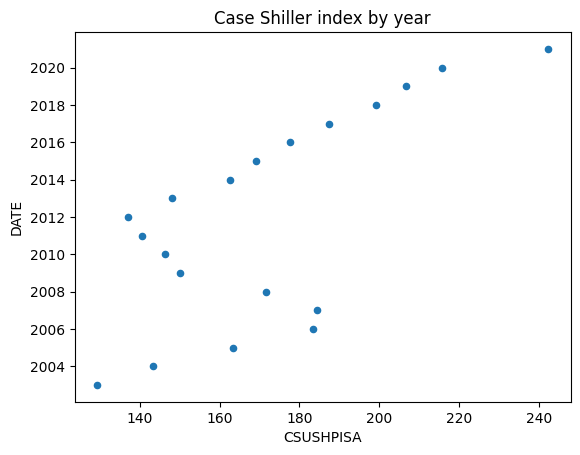

In [49]:
merged3.plot(x='CSUSHPISA', y='DATE', kind='scatter', title='Case Shiller index by year')

# Show the plot
plt.show()

You can obviously see the Housing Bubble and recession occur in 2008

<Axes: title={'center': 'Median Sale price vs Case Shiller'}, xlabel='MSPUS', ylabel='DATE'>

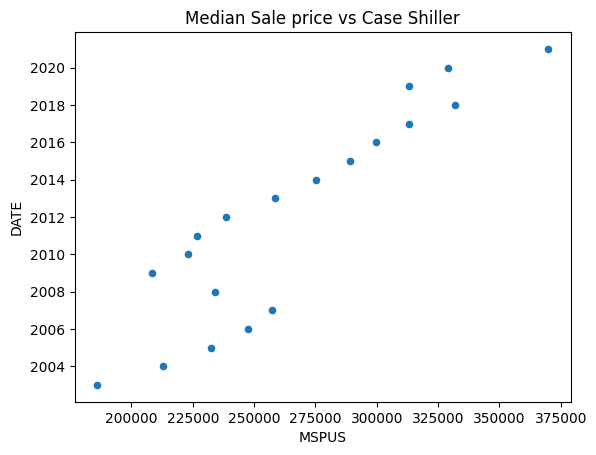

In [50]:
merged3.plot(x='MSPUS', y='DATE', kind='scatter', title='Median Sale price vs Case Shiller')

# Show the plot
plt.show()

Both variables are similar, but Case Shiller is generally considered more reliable in literature

<Axes: title={'center': 'Scatter Plot'}, xlabel='CSUSHPISA', ylabel='SP adj.'>

Text(0.5, 1.0, 'S&P 500 vs Case Shiller HI')

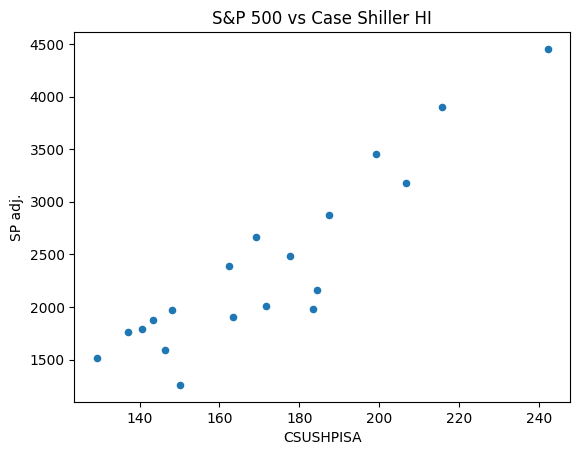

In [51]:
selected_data2.plot(x='CSUSHPISA', y='SP adj.', kind='scatter', title='Scatter Plot')
# Set the title
plt.title('S&P 500 vs Case Shiller HI')
# Show the plot
plt.show()

In [52]:
## This shows the adjusted S & P index increases similarly as the case shiller index does- positive correlation

<Axes: title={'center': '30 yr Mortgage Interest vs Case Shiller'}, xlabel='CSUSHPISA', ylabel='MORTGAGE30US'>

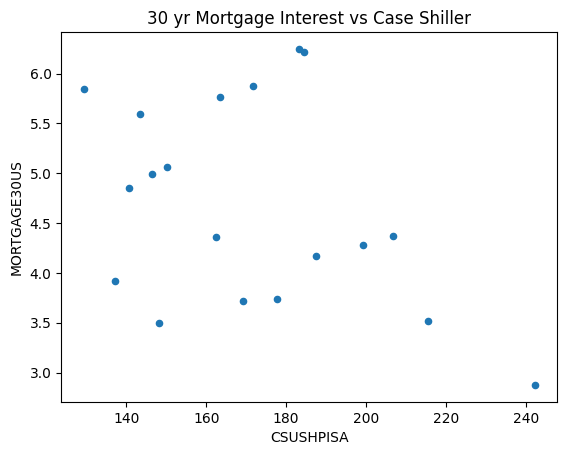

In [53]:
merged3.plot(x='CSUSHPISA', y='MORTGAGE30US', kind='scatter', title='30 yr Mortgage Interest vs Case Shiller')

# Show the plot
plt.show()

This shows that mortgage rates do not have much of an affect on home values (specifically the sales price), however it does affect how much buyers ultimately end up paying

In [54]:
merged3['MSACSR'] = merged3['MSACSR'].astype('float64')

<Axes: title={'center': 'New Housing Supply vs Case Shiller'}, xlabel='CSUSHPISA', ylabel='MSACSR'>

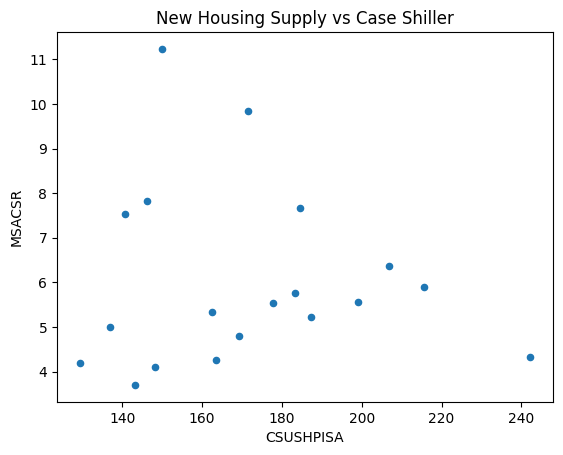

In [55]:
merged3.plot(x='CSUSHPISA', y='MSACSR', kind='scatter', title='New Housing Supply vs Case Shiller')

# Show the plot
plt.show()

In [56]:
merged3['TLRESCONS'] = merged3['TLRESCONS'].astype('float64')

<Axes: title={'center': 'Residential Construction $ spent vs Case Shiller'}, xlabel='CSUSHPISA', ylabel='TLRESCONS'>

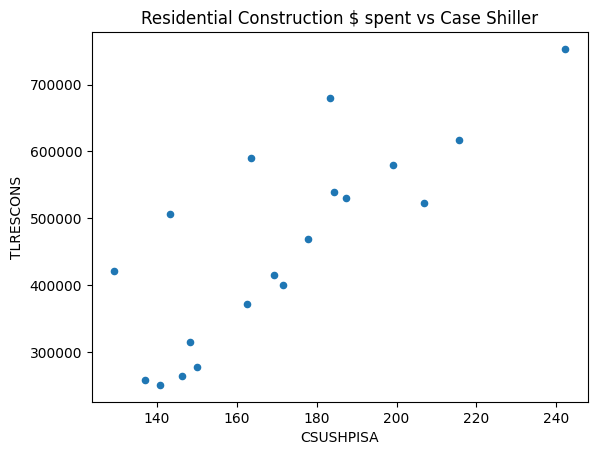

In [57]:
merged3.plot(x='CSUSHPISA', y='TLRESCONS', kind='scatter', title='Residential Construction $ spent vs Case Shiller')

# Show the plot
plt.show()

Residential Spending has a high positive correlation with home values. Residential spending also decreases sharply during the recession, as did home values.

<Axes: title={'center': 'Residential Construction $ spent each year'}, xlabel='TLRESCONS', ylabel='DATE'>

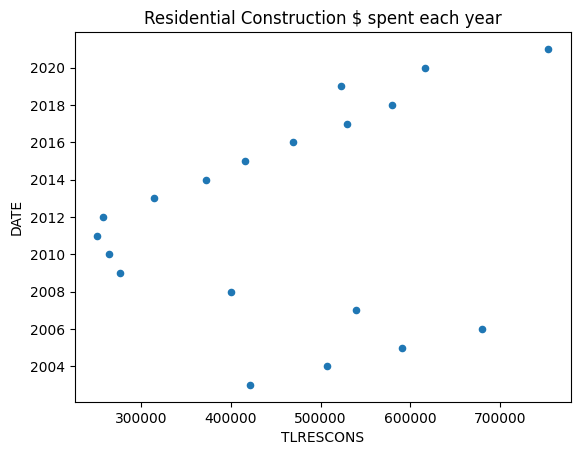

In [58]:
merged3.plot(x='TLRESCONS', y='DATE', kind='scatter', title='Residential Construction $ spent each year')

# Show the plot
plt.show()

In [59]:
merged3

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP_x,MSACSR,PERMIT,TLRESCONS,...,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,SP adj.,_merge
0,2003-01-01,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,4.200000,1806.333333,421328.6667,...,16.12,28.50,181.70,4.05,1231.77,22.16,39.19,22.90,1513.74,both
4,2004-01-01,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,3.700000,1994.666667,506856.3333,...,16.19,33.14,183.50,3.57,1274.31,22.04,45.12,23.59,1877.50,both
8,2005-01-01,163.481333,5.768462,94.066667,3.500000,232500.0,12767.286,4.266667,2105,590790.3333,...,16.59,38.58,185.20,4.27,1375.23,22.38,52.04,25.24,1902.06,both
12,2006-01-01,183.324333,6.246923,88.933333,5.583333,247700.0,13599.160,5.766667,2157,680067.3333,...,17.60,49.83,185.20,4.15,1527.77,23.74,67.22,27.66,1979.85,both
16,2007-01-01,184.422000,6.214615,92.200000,6.250000,257400.0,14215.651,7.666667,1606.666667,539003.6667,...,18.41,54.77,189.10,4.72,1456.97,24.32,72.36,25.90,2160.18,both
20,2008-01-01,171.575667,5.872308,72.900000,3.166667,233900.0,14706.538,9.833333,1025,400027.3333,...,19.16,57.77,189.90,4.13,1470.41,25.21,76.00,25.67,2005.47,both
24,2009-01-01,150.060000,5.060000,58.266667,0.500000,208400.0,14430.901,11.233333,538.6666667,276721.3333,...,19.70,59.11,190.70,4.22,1547.76,25.81,77.44,26.59,1258.65,both
28,2010-01-01,146.295000,4.995833,73.866667,0.666667,222900.0,14764.611,7.833333,657.6666667,263516.3333,...,20.70,62.25,194.40,4.14,1514.28,26.60,80.00,25.65,1592.01,both
32,2011-01-01,140.618000,4.846923,73.066667,0.750000,226900.0,15351.444,7.533333,567,250635.0000,...,21.47,66.47,198.80,4.20,1540.64,26.98,83.53,25.73,1788.18,both
36,2012-01-01,137.014333,3.922308,75.500000,0.750000,238400.0,16068.824,5.000000,752,257335.0000,...,22.41,70.78,198.30,4.42,1611.05,28.23,89.17,26.47,1761.68,both


# 2nd Dataset Load in

In [60]:
# Data link :https://www.bankrate.com/real-estate/median-home-price/#median-price-by-state

In [61]:
#this dataset incorporates only the MEDIAN home price for each state. I will merge it with economic data from each state
#data was collected in June 2023

!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/state%20data%20.csv

In [62]:
datST1=pd.read_csv('ex1.csv')

In [63]:
datST1.head(10)

,State,Price
0,Alabama,286000
1,Alaska,384000
2,Arizona,443000
3,Arkansas,259000
4,California,799000
5,Colorado,582000
6,Connecticut,432000
7,Delaware,335000
8,District of Columbia,606000
9,Florida,409000


In [64]:
#merging economic data for each state
#link: https://www.forbes.com/advisor/business/average-salary-by-state/

In [65]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/wage%20data.csv

In [66]:
datST2=pd.read_csv('ex1.csv')

In [67]:
datST2.head(10)

,State,Annual Average Wage,Average Hourly Wage
0,Alabama,50620,24.32
1,Alaska,66130,31.79
2,Arizona,58620,28.18
3,Arkansas,48570,23.35
4,California,73220,35.20
5,Colorado,67870,32.63
6,Connecticut,69310,33.32
7,Delaware,62260,29.93
8,Florida,55980,26.91
9,Georgia,58000,27.88


In [68]:
mergedSTATE = pd.merge(datST1, datST2, how='outer', on=['State'],indicator=True)

In [69]:
#this merged dataset looks at the average salary for each state, one being annual and one hourly
#the District of Columbia did not merge, since it was incorporated only in the first dataset

In [70]:
mergedSTATE

,State,Price,Annual Average Wage,Average Hourly Wage,_merge
0,Alabama,286000,50620.0,24.32,both
1,Alaska,384000,66130.0,31.79,both
2,Arizona,443000,58620.0,28.18,both
3,Arkansas,259000,48570.0,23.35,both
4,California,799000,73220.0,35.20,both
5,Colorado,582000,67870.0,32.63,both
6,Connecticut,432000,69310.0,33.32,both
7,Delaware,335000,62260.0,29.93,both
8,District of Columbia,606000,NaN,NaN,left_only
9,Florida,409000,55980.0,26.91,both


In [71]:
#you can see the median home prices vs the average wages in the graph below. In general, median prices are lower where incomes are lower

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Annual Average Wage')

Text(0.5, 1.0, 'Median Price vs. Annual Average Wage')

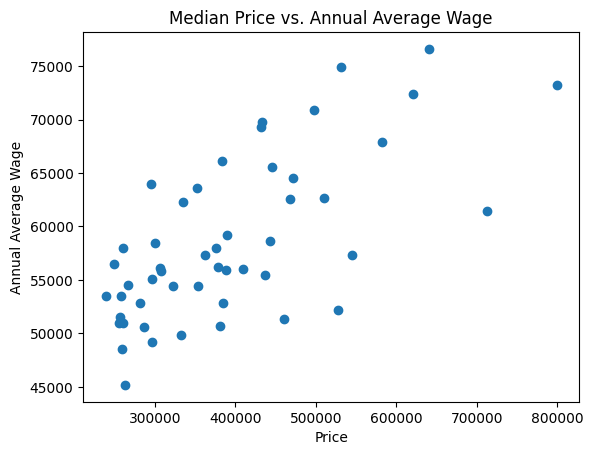

In [72]:
# Extract the two variables
x = mergedSTATE['Price']
y = mergedSTATE['Annual Average Wage']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Annual Average Wage')
plt.title('Median Price vs. Annual Average Wage')

# Show the plot
plt.show()

In [73]:
## These two dataset show the population and population density.
## links : https://wisevoter.com/state-rankings/population-density-by-state/#states-by-population-density
## https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1

In [74]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/data%20pop.csv

In [75]:
datST4=pd.read_csv('ex1.csv')

In [76]:
datST4.head(10)

,Unnamed: 0,State,Population
0,1,California,39029342
1,2,Texas,30029572
2,3,Florida,22244823
3,4,New York,19677151
4,5,Pennsylvania,12972008
5,6,Illinois,12582032
6,7,Ohio,11756058
7,8,Georgia,10912876
8,9,North Carolina,10698973
9,10,Michigan,10034113


In [77]:
datST4.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
datST4.head(5)

,State,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008


In [79]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/datapopdenn.csv

In [80]:
popden = pd.read_csv('ex1.csv')
popden

,State,Pop. Den (per mi sq.)
0,New Jersey,1283.40
1,Rhode Island,1074.30
2,Massachusetts,919.82
3,Connecticut,746.70
4,Maryland,648.84
5,Delaware,522.09
6,New York,433.90
7,Florida,416.96
8,Pennsylvania,292.62
9,Ohio,290.70


In [81]:
del mergedSTATE['_merge']

In [82]:
mergedSTATE2 = pd.merge(mergedSTATE, popden, how='outer', on=['State'],indicator=True)

In [83]:
# District of Columbia did not Merge as expected

In [84]:
mergedSTATE2

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge
0,Alabama,286000,50620.0,24.32,100.65,both
1,Alaska,384000,66130.0,31.79,1.30,both
2,Arizona,443000,58620.0,28.18,64.96,both
3,Arkansas,259000,48570.0,23.35,58.43,both
4,California,799000,73220.0,35.20,258.21,both
5,Colorado,582000,67870.0,32.63,57.86,both
6,Connecticut,432000,69310.0,33.32,746.70,both
7,Delaware,335000,62260.0,29.93,522.09,both
8,District of Columbia,606000,NaN,NaN,NaN,left_only
9,Florida,409000,55980.0,26.91,416.96,both


In [85]:
#This graph shows the population density for each state along with their median home price. There does not seem to be a strong correlation
#in any direction, but if anything, homes were slightly more expensive in densely populated states

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Pop. Den (per mi sq.)')

Text(0.5, 1.0, 'Median Price vs. Pop. Den (per mi sq.)')

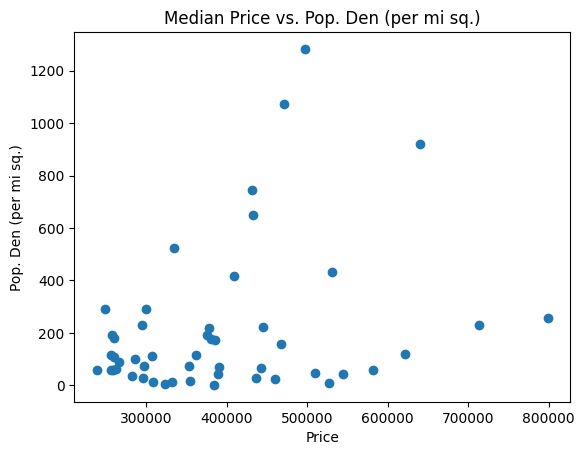

In [86]:
# Extract the two variables
x = mergedSTATE2['Price']
y = mergedSTATE2['Pop. Den (per mi sq.)']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Pop. Den (per mi sq.)')
plt.title('Median Price vs. Pop. Den (per mi sq.)')

# Show the plot
plt.show()

In [87]:
# 5th dataset

In [88]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/political%20data.csv

In [89]:
politics = pd.read_csv('ex1.csv')

In [90]:
# R shows that state voted Republican in 2020, D fro Democrat

In [91]:
print(politics)

             State 2020 results
0          Alabama            R
1           Alaska            R
2          Arizona            D
3         Arkansas            R
4       California            D
5         Colorado            D
6      Connecticut            D
7         Delaware            D
8             D.C.            D
9          Florida            R
10         Georgia            D
11          Hawaii            D
12           Idaho            R
13        Illinois            D
14         Indiana            R
15            Iowa            R
16          Kansas            R
17        Kentucky            R
18       Louisiana            R
19           Maine            D
20        Maryland            D
21   Massachusetts            D
22        Michigan            D
23       Minnesota            D
24     Mississippi            R
25        Missouri            R
26         Montana            R
27        Nebraska            R
28          Nevada            D
29   New Hampshire            D
30      

In [92]:
mergedSTATE3 = pd.merge(mergedSTATE2, politics, how='outer', on=['State'])

In [93]:
mergedSTATE3

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge,2020 results
0,Alabama,286000.0,50620.0,24.32,100.65,both,R
1,Alaska,384000.0,66130.0,31.79,1.30,both,R
2,Arizona,443000.0,58620.0,28.18,64.96,both,D
3,Arkansas,259000.0,48570.0,23.35,58.43,both,R
4,California,799000.0,73220.0,35.20,258.21,both,D
5,Colorado,582000.0,67870.0,32.63,57.86,both,D
6,Connecticut,432000.0,69310.0,33.32,746.70,both,D
7,Delaware,335000.0,62260.0,29.93,522.09,both,D
8,District of Columbia,606000.0,NaN,NaN,NaN,left_only,NaN
9,Florida,409000.0,55980.0,26.91,416.96,both,R


In [94]:
# Define the condition
condition = mergedSTATE3['2020 results'] == 'D'

# Filter the Dataset based on the condition
filtered_data = mergedSTATE3[condition]

# Calculate the average of the price for only D
average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 455280.0


In [95]:
# Same but for R
condition = mergedSTATE3['2020 results'] == 'R'

filtered_data = mergedSTATE3[condition]

average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 330520.0


In [96]:
## this comparision shows the average price of homes in states that voted democratic, and also states that voted Republican
## this shows that on average, states with higher home values voted democratic while states with lower land values voted republican
# Democratic average = $455,280
# Republican average = $330,520

# Explaining the data (state)

The data collected was collected in June 2023 after Q2, and the political party is from 2020.
Median Price, Average Wage (annual and hourly), population desity, 2020 results

In [97]:
## links : https://wisevoter.com/state-rankings/population-density-by-state/#states-by-population-density
## https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1
#link: https://www.forbes.com/advisor/business/average-salary-by-state/

In [98]:
mergedSTATE3['Pop. Den (per mi sq.)'] = mergedSTATE3['Pop. Den (per mi sq.)'].astype('float64')

In [99]:
mergedSTATE3

,State,Price,Annual Average Wage,Average Hourly Wage,Pop. Den (per mi sq.),_merge,2020 results
0,Alabama,286000.0,50620.0,24.32,100.65,both,R
1,Alaska,384000.0,66130.0,31.79,1.30,both,R
2,Arizona,443000.0,58620.0,28.18,64.96,both,D
3,Arkansas,259000.0,48570.0,23.35,58.43,both,R
4,California,799000.0,73220.0,35.20,258.21,both,D
5,Colorado,582000.0,67870.0,32.63,57.86,both,D
6,Connecticut,432000.0,69310.0,33.32,746.70,both,D
7,Delaware,335000.0,62260.0,29.93,522.09,both,D
8,District of Columbia,606000.0,NaN,NaN,NaN,left_only,NaN
9,Florida,409000.0,55980.0,26.91,416.96,both,R


This Graph shows the median home price for each state

In [100]:
fig = px.scatter(mergedSTATE3, x='State', y='Price', hover_data=['State'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Median Home Price in every state 2023')

Here is Median home prices compared to average salary. Each state can be shown when hovering over the point

In [101]:
fig = px.scatter(mergedSTATE3, x='Annual Average Wage', y='Price', hover_data=['State'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Home Price vs Salary')

Similarly, this graph shows Home prices compared to hourly wages rather than salary

<Axes: title={'center': 'Home price vs Wage (hourly)'}, xlabel='Average Hourly Wage', ylabel='Price'>

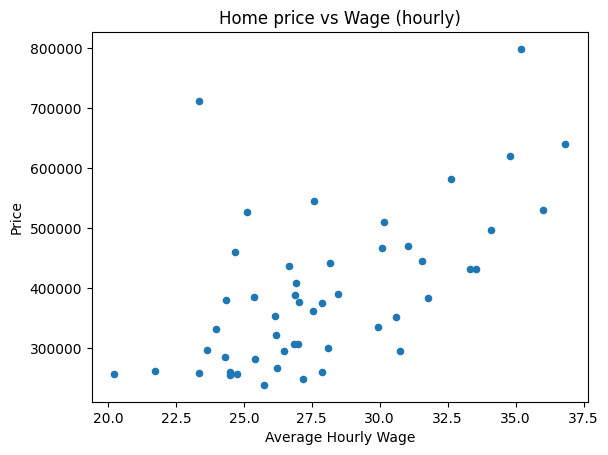

In [102]:
mergedSTATE3.plot(x='Average Hourly Wage', y='Price', kind='scatter', title='Home price vs Wage (hourly)')

# Show the plot
plt.show()

You can see that home prices are generally lower in states with lower population density. This would infer that home prices are lower in areas with lower population densities.

<Axes: title={'center': 'Home Price vs pop density'}, xlabel='Pop. Den (per mi sq.)', ylabel='Price'>

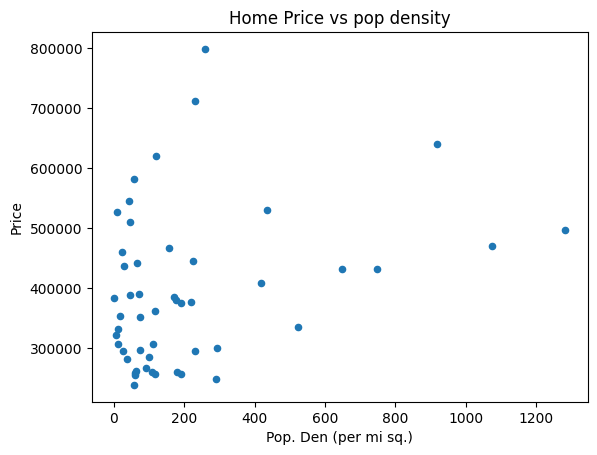

In [103]:
mergedSTATE3.plot(x='Pop. Den (per mi sq.)', y='Price', kind='scatter', title='Home Price vs pop density')

# Show the plot
plt.show()

In [104]:
## since these are averages by state instead of city/ county, some state's data will be a little skewed. For example,
#the state of New York aside from New York City is not extremely densely populated. Because of this, their average density falls
#and is actually lower than NJ, MA, RI, MS, and DE.

Political Variable

In [105]:
# Define the condition
condition = mergedSTATE3['2020 results'] == 'D'

# Filter the Dataset based on the condition
filtered_data = mergedSTATE3[condition]

# Calculate the average of the price for only D
average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 455280.0


In [106]:
# Same but for R
condition = mergedSTATE3['2020 results'] == 'R'

filtered_data = mergedSTATE3[condition]

average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 330520.0


In [107]:
## this comparision shows the average price of homes in states that voted democratic, and also states that voted Republican
## this shows that on average, states with higher home values voted democratic while states with lower land values voted republican
# Democratic average = $455,280
# Republican average = $330,520

What does this mean?

In [108]:
## since low population density correlates with lower property values,
## I would like to see if there is any correlation between pop. density
## and voting preference

In [109]:
# Define the condition
condition = mergedSTATE3['2020 results'] == 'D'

# Filter the Dataset based on the condition
filtered_data = mergedSTATE3[condition]

# Calculate the average of the price for only D
average_value = filtered_data['Pop. Den (per mi sq.)'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 321.01040000000006


In [110]:
# Same but for R
condition = mergedSTATE3['2020 results'] == 'R'

filtered_data = mergedSTATE3[condition]

average_value = filtered_data['Pop. Den (per mi sq.)'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 99.02679999999998


Average Population Density in Republican states = 99.03 per sq mile
Average Population Density in Democratic states = 321.01 per sq mile

It may be population density that has an effect on housing prices rather than which political party the state is in favor of.

# extra merges - happiness correlations

In [111]:
## This is not relevant to housing, but the population density made me think about the happiness work Dr. Adam has done
## I was curious how pop denisty and happiness may compare

In [112]:
## Score on a scale of 1- 50

In [113]:
# link: https://wallethub.com/edu/happiest-states/6959

In [114]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/Untitled%20spreadsheet%20-%20Sheet1.csv

In [115]:
!pwd

!ls

/content
ex1.csv  sample_data


In [116]:
happiness=pd.read_csv('ex1.csv')

In [117]:
happiness

,State,Total Score,Emotional & Physical Well-Being,Work Environment,Community & Environment
0,Utah,69.79,16,1,1
1,Hawaii,66.42,1,25,30
2,Maryland,64.62,8,4,5
3,Minnesota,62.82,10,3,13
4,New Jersey,61.98,3,14,29
5,Connecticut,60.68,6,32,8
6,California,60.53,5,34,10
7,Florida,59.31,2,21,44
8,Idaho,59.31,30,6,2
9,Nebraska,58.92,12,7,25


In [118]:
mergedSTATEHAPPY = pd.merge(happiness, popden, how='outer', on=['State'],indicator=True)

In [119]:
mergedSTATEHAPPY

,State,Total Score,Emotional & Physical Well-Being,Work Environment,Community & Environment,Pop. Den (per mi sq.),_merge
0,Utah,69.79,16,1,1,41.67,both
1,Hawaii,66.42,1,25,30,231.01,both
2,Maryland,64.62,8,4,5,648.84,both
3,Minnesota,62.82,10,3,13,73.18,both
4,New Jersey,61.98,3,14,29,1283.40,both
5,Connecticut,60.68,6,32,8,746.70,both
6,California,60.53,5,34,10,258.21,both
7,Florida,59.31,2,21,44,416.96,both
8,Idaho,59.31,30,6,2,23.24,both
9,Nebraska,58.92,12,7,25,26.06,both


In [120]:
fig = px.scatter(mergedSTATEHAPPY, x='State', y='Total Score', hover_data=['State'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="bottom",xanchor="left"),
    title_text = 'Happiness by State')

In [121]:
fig = px.scatter(mergedSTATEHAPPY, x='Pop. Den (per mi sq.)', y='Total Score', hover_data=['State'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Pop. Density vs Happiness')

There does not seem to be any relationship based on this data

<Axes: title={'center': 'pop density vs work happiness'}, xlabel='Work Environment', ylabel='Pop. Den (per mi sq.)'>

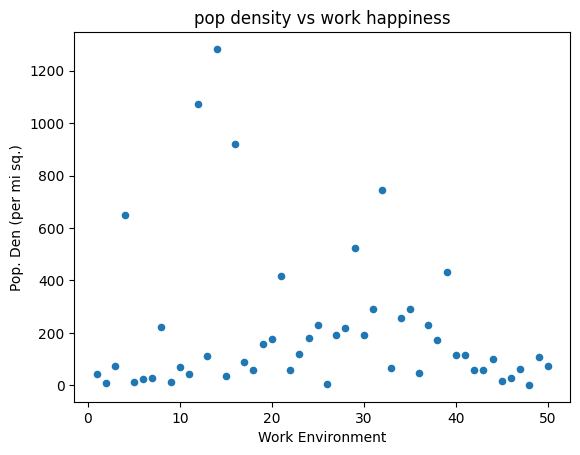

In [122]:
mergedSTATEHAPPY.plot(x='Work Environment', y='Pop. Den (per mi sq.)', kind='scatter', title='pop density vs work happiness')

# Show the plot
plt.show()

In [123]:
mergedSTATEHAPPY2 = pd.merge(happiness, datST1, how='outer', on=['State'],indicator=True)

In [124]:
mergedSTATEHAPPY2

,State,Total Score,Emotional & Physical Well-Being,Work Environment,Community & Environment,Price,_merge
0,Utah,69.79,16.0,1.0,1.0,545000,both
1,Hawaii,66.42,1.0,25.0,30.0,713000,both
2,Maryland,64.62,8.0,4.0,5.0,433000,both
3,Minnesota,62.82,10.0,3.0,13.0,353000,both
4,New Jersey,61.98,3.0,14.0,29.0,498000,both
5,Connecticut,60.68,6.0,32.0,8.0,432000,both
6,California,60.53,5.0,34.0,10.0,799000,both
7,Florida,59.31,2.0,21.0,44.0,409000,both
8,Idaho,59.31,30.0,6.0,2.0,460000,both
9,Nebraska,58.92,12.0,7.0,25.0,296000,both


In [125]:
fig = px.scatter(mergedSTATEHAPPY2, x='Total Score', y='Price', hover_data=['State'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Median home price vs Happiness by state')

This graph shows states with higher prices homes scored higher on the happiness tests. One hypothesis could be that states with higher home prices are generally wealthier, and citizens in these states live in safer communities that are more conducive to happy lives.

# Profiling with mergedSTATE3 data

In [126]:
!pip install ydata-profiling #from aok code

In [127]:
!pip uninstall typing_extensions --yes
#!pip install typing-extensions --upgrade
!pip install typing_extensions==4.7.1  --upgrade

Found existing installation: typing_extensions 4.7.1
Uninstalling typing_extensions-4.7.1:
  Successfully uninstalled typing_extensions-4.7.1
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


In [128]:
from ydata_profiling import ProfileReport

In [129]:
ProfileReport(mergedSTATE3, title="State Housing Data")

# County Level Data

My last dataset will look only at counties in New Jersey, using variables such as income, population and median income

In [130]:
# pull data from wikipedia

In [178]:
Countydat2=pd.read_html('https://en.wikipedia.org/wiki/List_of_New_Jersey_locations_by_per_capita_income',match='County',flavor=None)[0].head(23)


In [179]:
Countydat2

,Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,Hunterdon,"$48,489","$100,980","$121,166",128349,47169
1,2.0,Morris,"$47,342","$96,747","$114,694",492276,180534
2,3.0,Somerset,"$47,067","$97,440","$115,214",323444,117759
3,4.0,Bergen,"$42,006","$81,708","$100,310",905116,335730
4,5.0,Monmouth,"$40,976","$82,265","$102,074",630380,233983
5,6.0,Mercer,"$36,016","$71,217","$88,694",366513,133155
6,7.0,Sussex,"$35,982","$83,089","$93,701",149265,54752
7,NaN,New Jersey,"$34,858","$69,811","$84,904",8791894,3214360
8,8.0,Burlington,"$34,802","$76,258","$91,185",448734,166318
9,9.0,Union,"$34,096","$66,791","$80,818",536499,188118


In [180]:
Countydat2['Median household income']=Countydat2['Median household income'].str.replace('$', '')

<ipython-input-180-efee001d9d32>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [181]:
Countydat2['Per capita income']=Countydat2['Per capita income'].str.replace('$', '')

<ipython-input-181-4f58a4f5b943>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [182]:
Countydat2['Median household income']=Countydat2['Median household income'].str.replace(',', '')

In [183]:
Countydat2['Per capita income']=Countydat2['Per capita income'].str.replace(',', '')

In [184]:
Countydat2

,Rank,County,Per capita income,Median household income,Median family income,Population,Number of households
0,1.0,Hunterdon,48489,100980,"$121,166",128349,47169
1,2.0,Morris,47342,96747,"$114,694",492276,180534
2,3.0,Somerset,47067,97440,"$115,214",323444,117759
3,4.0,Bergen,42006,81708,"$100,310",905116,335730
4,5.0,Monmouth,40976,82265,"$102,074",630380,233983
5,6.0,Mercer,36016,71217,"$88,694",366513,133155
6,7.0,Sussex,35982,83089,"$93,701",149265,54752
7,NaN,New Jersey,34858,69811,"$84,904",8791894,3214360
8,8.0,Burlington,34802,76258,"$91,185",448734,166318
9,9.0,Union,34096,66791,"$80,818",536499,188118


In [134]:
# pull County dataset showing house prices from Zillow
# source https://www.zillow.com/research/data/

In [185]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/County%20House%20data%20Zillow.csv

In [186]:
!pwd

!ls

/content
ex1.csv  sample_data


In [187]:
Countydat=pd.read_csv('ex1.csv')

In [188]:
Countydat['County']=Countydat['County'].str.strip()

In [189]:
mergedCounty = pd.merge(Countydat, Countydat2, how='outer', on=['County'],indicator=True)


In [190]:
mergedCounty.dtypes

County                            object
Median Zillow home estimate      float64
Rank                             float64
Per capita income                 object
Median household income           object
Median family income              object
Population                         int64
Number of households               int64
_merge                          category
dtype: object

In [191]:
mergedCounty['Median household income'] = mergedCounty['Median household income'].astype(float)

In [192]:
mergedCounty['Per capita income'] = mergedCounty['Per capita income'].astype(float)

You can see each County's median houshold income and per capita income vs thier zillow home value estimates

In [193]:
fig = px.scatter(mergedCounty, x='Median household income', y='Median Zillow home estimate ', hover_data=['County'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Zillow estimate vs Income')

In [194]:
fig = px.scatter(mergedCounty, x='Per capita income', y='Median Zillow home estimate ', hover_data=['County'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Zillow estimate vs Income per Capita')

<Axes: title={'center': 'Zillow estimate vs Population'}, xlabel='Median Zillow home estimate ', ylabel='Population'>

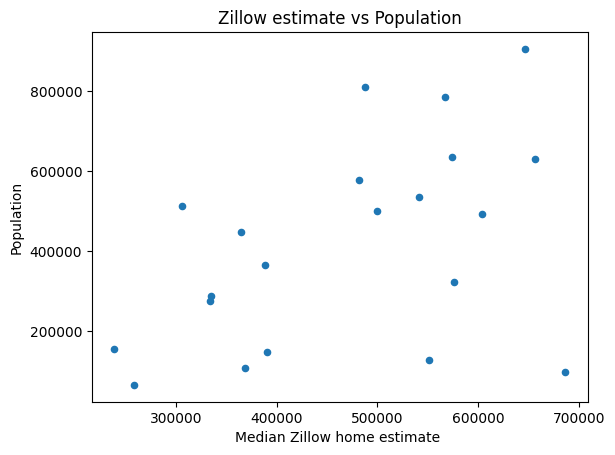

In [198]:
 mergedCounty.plot(x='Median Zillow home estimate ', y='Population', kind='scatter', title='Zillow estimate vs Population')

# Show the plot
plt.show()

# Conclusion

These datasets show that Home values seem to be dependent on the economy, as the S&P 500 values correlated highly with home values each year. Also, the state level data showed us that states with lower population densities often have lower home values. We did not find much correlation between happiness levels and population density, however there was a correlation with happiness scores and home values. The data that was collected by state, county, and year all generally showed similar trends.